In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import random

In [2]:
mu, sigma = 0, 0.1
s = np.random.normal(mu, sigma, 1000)

mu, sigma = 1, 0.4
s1 = np.random.normal(mu, sigma, 1000)

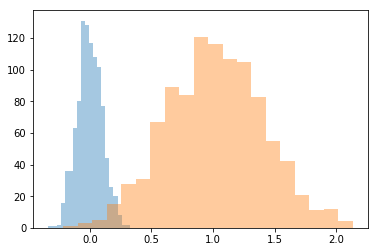

In [3]:
sns.distplot(s, bins=20, kde=False)
sns.distplot(s1, bins=20, kde=False)

In [4]:
data = np.append(s,s1)

In [20]:
class gmm:
    def __init__(self, gsns):
        self.gsns = [gsn(random.random(), random.random(), random.random()) for _gsn in range(gsns)]
        
    def plot(self,x):
        [gsn.plot(x) for gsn in self.gsns]
        
    def e(self, x):
        xpcts = np.array([gsn.pdf(x) for gsn in self.gsns])
        xpct_sum = np.sum(xpcts, axis=0)
        xpcts = [xpct/xpct_sum for xpct in xpcts]
        return xpcts
        
    def m_mean(self, x, xpcts):
        for ind in range(len(self.gsns)):
            self.gsns[ind].mean = np.sum(xpcts[ind]*x)/np.sum(xpcts[ind])
        
    def m_std(self, x, xpcts):
        for ind in range(len(self.gsns)):
            self.gsns[ind].std = np.sum(xpcts[ind]*(x-self.gsns[ind].mean))/np.sum(xpcts[ind])
        
    def m_mcf(self, x, xpcts):
        for ind in range(len(self.gsns)):
            self.gsns[ind].mcf = np.sum(xpcts[ind])/len(x)
        
    def m(self, x, xpcts):
        self.m_mean(x, xpcts)
#         self.m_std(x, xpcts)
        self.m_mcf(x, xpcts)
        
    def update(self, x):
        xpcts = self.e(x)
        self.m(x, xpcts)
        
    def train(self, x, iters):
        [self.update(x) for iter in range(iters)]

In [21]:
class gsn:
    def __init__(self, mean, std, mcf):
        self.mean = mean
        self.std = std
        self.mcf = mcf
    
    def pdf(self, x):
        return self.mcf * stats.norm(self.mean, self.std).pdf(x)
        
    def plot(self, x):
        plt.plot(x, self.pdf(x))
        

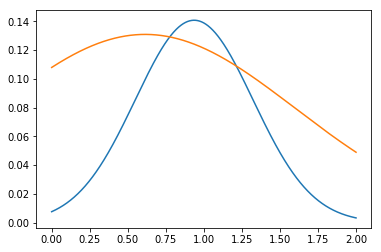

In [26]:
_gmm = gmm(2)
x = np.linspace(0,2,1000)
_gmm.plot(x)

In [27]:
xpcts = _gmm.e(data)

In [28]:
_gmm.train(data,100)

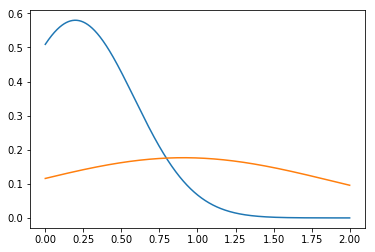

In [29]:
_gmm.plot(x)